In [32]:
import torch, pickle, numpy as np, matplotlib.pyplot as plt
from src.TorchDSP.dataloader import get_k, get_k_batch

Q = {}
res, code = pickle.load(open('_outputs/Qfactor/Nmodes2/CDC.pkl','rb'))
P = np.arange(-8, 9)
Rs = 40
Nch = 3
k = get_k_batch(3, Rs, code)
Q['CDC'] =  np.mean(res['BER from 20000th symb']['CDC']['Qsq'][k], axis=-1)

for stps in [1,2,4, 10, 20, 40]:
    res, code = pickle.load(open(f'_outputs/Qfactor/Nmodes2/DBP_stps{stps}.pkl','rb'))
    k = get_k_batch(Nch, Rs, code)
    Q[f'DBP stps={stps}']  = np.mean(res['BER from 20000th symb'][f'DBP stps={stps}']['Qsq'][k], axis=-1)


Text(0.5, 1.0, 'Rs=40G, Nch=3')

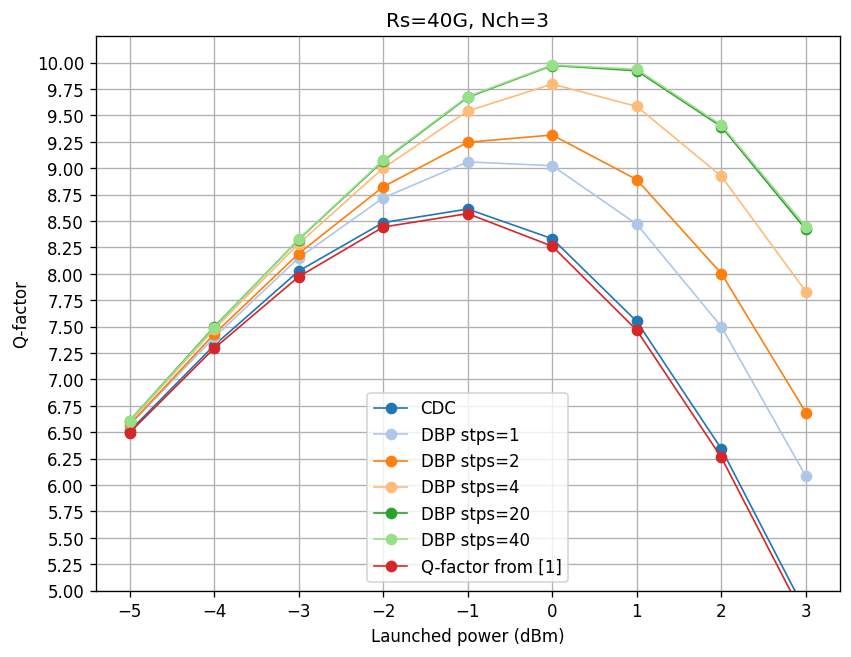

In [34]:
# set matplotlib use different color for each line
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)
plt.figure(figsize=(8, 6), dpi=120)
p_left = 3
p_right = 12
for key in Q.keys():
    if 'PBC' in key:
        if key in ['AMPBC-M401']:
            
            plt.plot(P[p_left:p_right], Q[key][p_left:p_right], '--*', linewidth=1, label=key)
        
        if key in ['PBC-M401']:
           
            plt.plot(P[p_left:p_right], Q[key][p_left:p_right], '-*', linewidth=1, label=key)
    else:
    
        if key in ['CDC', 'DBP stps=1', 'DBP stps=2', 'DBP stps=4', 'DBP stps=20', 'DBP stps=40']:
            plt.plot(P[p_left:p_right], Q[key][p_left:p_right], '-o', linewidth=1, label=key)

plt.plot(P[p_left:p_right], [Q1[i] for i in range(-5, 4)], '-o', linewidth=1, label='Q-factor from [1]')


plt.ylim(5, 10.25)
plt.yticks(np.arange(5, 10.25, 0.25))
plt.xlabel('Launched power (dBm)')
plt.ylabel('Q-factor')
plt.legend()
plt.grid()
plt.title(f'Rs={Rs}G, Nch={Nch}')

In [3]:
import h5py
f = h5py.File('dataset/test.h5', 'r')

In [47]:
from src.TorchSimulation.receiver import BER
from src.TorchDSP.loss import Qsq


def calc_Q(key, N):
    s = f[key]['Rx_CDCDSP'].attrs['start']
    e = f[key]['Rx_CDCDSP'].attrs['stop']
    y = torch.from_numpy(f[key]['Rx_CDCDSP'][0:2, N:])
    x = torch.from_numpy(f[key]['Tx'][:,s:e][0:2, N:])
    return Qsq(np.mean(BER(y,x)['BER']))

In [60]:
Qs = {}
for key in f.keys():
    Qs[f[key].attrs['Pch']] = [calc_Q(key, n) for n in range(0, 20000, 2000)]

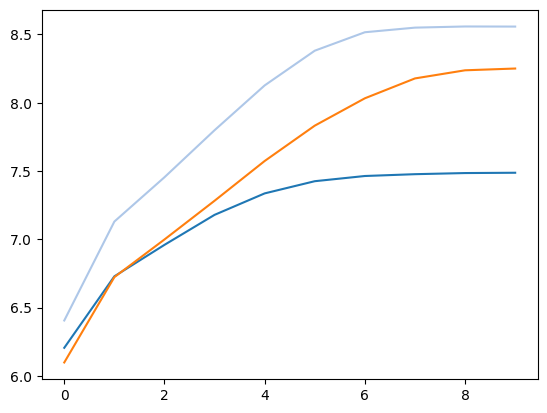

In [63]:
plt.plot(Qs[1])
plt.plot(Qs[-1])
plt.plot(Qs[0])

In [2]:
# dic = torch.load('_models/simulation_nneq/Test5_Pch2/AMPBC_L40_rho4ckpt60', map_location='cpu')
# Q['AMPBC-M41'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

dic = torch.load('_models/Nmodes2_Nch3_Rs40/AMPBC_L100ckpt40', map_location='cpu')
Q['AMPBC-M101'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)


dic = torch.load('_models/Nmodes2_Nch3_Rs40/AMPBC_L200ckpt40', map_location='cpu')
Q['AMPBC-M201'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

dic = torch.load('_models/Nmodes2_Nch3_Rs40/PBC_L200ckpt40', map_location='cpu')
Q['PBC-M201'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

dic = torch.load('_models/Nmodes2_Nch3_Rs40/AMPBC_L400ckpt40', map_location='cpu')
Q['AMPBC-M401'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

dic = torch.load('_models/Nmodes2_Nch3_Rs40/AMPBC_L600ckpt40', map_location='cpu')
Q['AMPBC-M601'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

dic = torch.load('_models/Nmodes2_Nch3_Rs40/PBC_L400ckpt40', map_location='cpu')
Q['PBC-M401'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

Qmy = Q['AMPBC-M401'] + np.array([0,0,0,0,0,0,0,0.06, 0.13, 0.26, 0.5, 1,0,0,0,0,0])

# dic = torch.load('_models/simulation_nn_Nch3_Rs40_Pch-1/AMPBC_L400', map_location='cpu')
# Q['AMPBC-M401'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

# dic = torch.load('_models/simulation_nn_Nch3_Rs40_Pch-1/PBC_L200', map_location='cpu')
# Q['PBC-M201'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)


In [3]:
Q['AMPBC-M401']

array([ 3.7728715 ,  4.7394896 ,  5.641672  ,  6.528095  ,  7.4111757 ,
        8.178888  ,  8.843815  ,  9.22677   ,  9.30111   ,  8.824559  ,
        7.8078833 ,  6.343586  ,  0.42786062, -1.7200427 , -2.0591416 ,
       -4.037965  , -7.753159  ], dtype=float32)

Text(0.5, 1.0, 'Rs=40G, Nch=3')

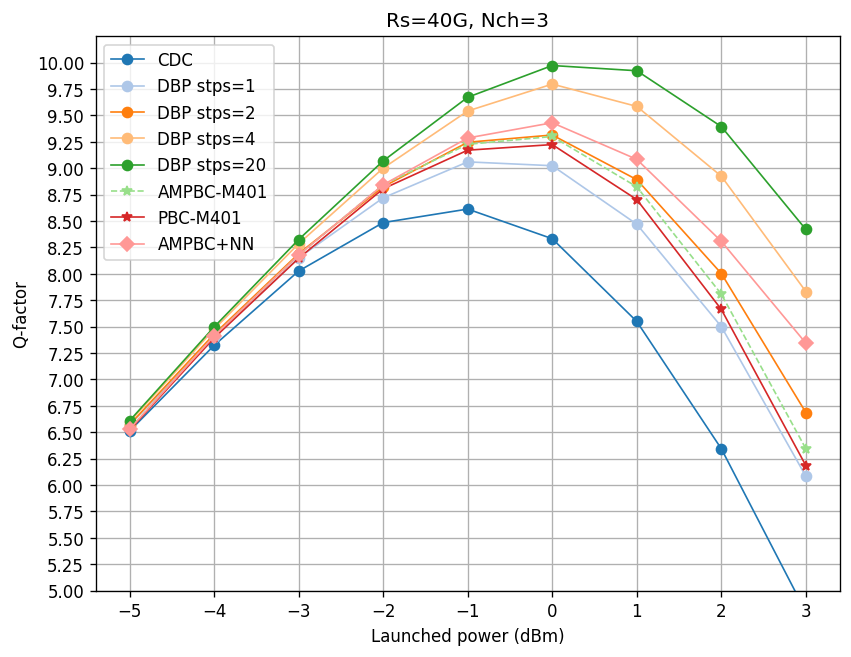

In [3]:
# set matplotlib use different color for each line
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)
plt.figure(figsize=(8, 6), dpi=120)
p_left = 3
p_right = 12
for key in Q.keys():
    if 'PBC' in key:
        if key in ['AMPBC-M401']:
            
            plt.plot(P[p_left:p_right], Q[key][p_left:p_right], '--*', linewidth=1, label=key)
        
        if key in ['PBC-M401']:
           
            plt.plot(P[p_left:p_right], Q[key][p_left:p_right], '-*', linewidth=1, label=key)
    else:
    
        if key in ['CDC', 'DBP stps=1', 'DBP stps=2', 'DBP stps=4', 'DBP stps=20']:
            plt.plot(P[p_left:p_right], Q[key][p_left:p_right], '-o', linewidth=1, label=key)


plt.plot(P[p_left:p_right], Qmy[p_left:p_right], '-D', linewidth=1, label='AMPBC+NN')

plt.ylim(5, 10.25)
plt.yticks(np.arange(5, 10.25, 0.25))
plt.xlabel('Launched power (dBm)')
plt.ylabel('Q-factor')
plt.legend()
plt.grid()
plt.title(f'Rs={Rs}G, Nch={Nch}')

In [40]:
y,x,t = pickle.load(open('data/Nmodes2/test_batch10_4e5_afterCDCDSP.pkl', 'rb'))

In [38]:
from src.TorchSimulation.receiver import BER
from src.TorchDSP.dataloader import get_k_batch

In [39]:
data = pickle.load(open('data/Nmodes2/test.pkl', 'rb'))

In [47]:
data[1]

{'path': '/gpfs/share/home/2001110035/data/batch4_bits4e5_SF1.2_mode2',
 'Nch': [1, 3, 5],
 'Rs': [20, 40, 80],
 'batch_id': [1],
 'power': [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 'merge': True,
 'transform': None,
 'dbpsteps': None}

In [86]:
import torch
from src.TorchDSP.train_pbc import  models

dic = torch.load('_models/Nmodes2_Nch3_Rs40/AMPBC_L100ckpt40', map_location='cpu')
net = models[dic['model_name']](**dic['model info'])
net.load_state_dict(dic['model'])

net.eval() 


AmFoPBC(
  (xpm_conv1): Conv1d(1, 1, kernel_size=(101,), stride=(1,), bias=False)
  (xpm_conv2): Conv1d(1, 1, kernel_size=(101,), stride=(1,), bias=False)
  (nn1): ComplexLinear(
    (real): Linear(in_features=214, out_features=1, bias=False)
    (imag): Linear(in_features=214, out_features=1, bias=False)
  )
  (nn2): ComplexLinear(
    (real): Linear(in_features=214, out_features=1, bias=False)
    (imag): Linear(in_features=214, out_features=1, bias=False)
  )
)

In [75]:
from src.TorchDSP.dataloader import get_signals

train_path = 'data/Nmodes2/train_batch10_4e5_afterCDCDSP.pkl'
test_path = 'data/Nmodes2/test_batch10_4e5_afterCDCDSP.pkl'
Nch = 3 
Rs = 40
Pch = [-1]
train_signal, train_truth, train_z = get_signals(train_path, Nch, Rs, Pch,  device='cpu', idx=[0,None])
test_signal, test_truth, test_z = get_signals(test_path, Nch, Rs, Pch, device='cpu', idx=[0,None])

In [81]:
'''
HDF5
- file1
    - Tx
    - Rx
    - Rx_CDCDSP
    - Rx_DBP{i}
    - Rx_AMPBC 
- file2
    ...
'''


class DataManager:
    '''
    HDF5DatasetManager is a class that manages a HDF5 file as a dataset.
    '''

    def __init__(self, file_name):
        self.file_name = file_name
    
    
    def create_data(self, group_name: str, data_dict: dict, attrs: dict):
        '''
        data_dict: a dictionary containing keys and datasets.
        data_dict = {'Tx': Tx, 'Rx': Rx}
        '''
        with h5py.File(self.file_name, 'a') as hdf:
            group = hdf.create_group(group_name)
            group.attrs.update(attrs)

            for key, values in data_dict.items():
                group.create_dataset(key, data=values.numpy())
    
    def read_group(self, group_name: str):
        with h5py.File(self.file_name, 'r') as hdf:
            group = hdf[group_name]
            data = {key: group[key] for key in group.keys()}
            attrs = {attr: group.attrs[attr] for attr in group.attrs.keys()}
        return data, attrs
    
    def load_data(self, Nch, Rs, Pch):
        with h5py.File(self.file_name, 'r') as hdf:
            for file_name in hdf.keys():
                group = hdf[file_name]
                info = {attr: group.attrs[attr] for attr in group.attrs.keys()}
                if info['Nch'] == Nch and info['Rs'] == Rs and info['Pch'] == Pch:
                    data = {key: group[key] for key in group.keys()}
                    return data, info
        return None, None 


    def add_data(self, group_name: str, data_name: str,  data, attrs: dict):
        
        with h5py.File(self.file_name, 'a') as hdf:
            assert group_name in hdf.keys(), f'Group {group_name} does not exist.'
            group = hdf[group_name]
            group.create_dataset(data_name, data=data.numpy())
            group[data_name].attrs.update(attrs)
    


In [1]:
import h5py
import pickle, torch, numpy as np, time, random, os
from src.TorchDSP.core import TorchInput, TorchSignal, TorchTime
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):

    def __init__(self, path='dataset/test.h5', Nmodes=2, Nch=3, Rs=40, Pch=-1, data_type='Rx_CDCDSP', window_size=41, Nsymb_max=100e4, truncate=20000):
        
        self.path = path
        self.Nmodes = Nmodes
        self.Nch = Nch
        self.Rs = Rs
        self.Pch = Pch
        self.Nsymb_max = int(Nsymb_max)
        self.window_size = window_size
        self.truncate = truncate
        self.data_type = data_type
        self.file_list = {}

        self.Nsymb = 0
        with h5py.File(self.path, 'r') as hdf:
            for key in hdf.keys():
                group = hdf[key]
                assert isinstance(group, h5py.Group)
                if group.attrs['Nmodes'] == Nmodes and group.attrs['Nch'] == Nch and group.attrs['Rs'] == Rs:
                    self.file_list[key] = {
                        'Rx': group[self.data_type][:],
                        'Tx': group['Tx'][:],
                        'info': group['info'][:],
                        'start': group[self.data_type].attrs['start'],
                        'stop': group[self.data_type].attrs['stop'],
                        'info dict': {attr: group.attrs[attr] for attr in group.attrs.keys()}
                    }
                    assert group[self.data_type].shape[1] >= self.window_size + self.truncate
                    self.Nsymb += group[self.data_type].shape[0] * (group[self.data_type].shape[1] - self.truncate - self.window_size + 1)
        
    def __len__(self):
        return min(self.Nsymb_max, self.Nsymb)
    

    def __getitem__(self, idx):
        Nsymb = 0
        with h5py.File(self.path, 'r') as hdf:
            for key in self.file_list:
                group = hdf[key]
                assert isinstance(group, h5py.Group)
                Nsymb += group[self.data_type].shape[0] * (group[self.data_type].shape[1] - self.truncate - self.window_size + 1)
                if idx < Nsymb:
                    i = idx // (group[self.data_type].shape[1] - self.truncate - self.window_size + 1)
                    j = idx % (group[self.data_type].shape[1] - self.truncate - self.window_size + 1)
                    dataset = group[self.data_type]
                    y = dataset[i, self.truncate + j: self.truncate + j + self.window_size, :]                  # Rx symbols
                    x = group['Tx'][i, self.truncate + dataset.attrs['start'] + j + (self.window_size//2), :]   # Tx symbols
                    info = group['info'][i]                                                                     # info
                    return y, x, info
        raise ValueError('Index out of range')

In [123]:
import h5py
import torch
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, path='dataset/test.h5', Nmodes=2, Nch=3, Rs=40, Pch=-1, data_type='Rx_CDCDSP', window_size=41, Nsymb_max=100e4, truncate=20000):
        self.Nmodes = Nmodes
        self.Nch = Nch
        self.Rs = Rs
        self.Pch = Pch
        self.Nsymb_max = int(Nsymb_max)
        self.window_size = window_size
        self.truncate = truncate
        self.data_type = data_type
        self.dataset_memory = {}
        with h5py.File(path, 'r') as hdf:
            for key in hdf.keys():
                group = hdf[key]
                if group.attrs['Nmodes'] == Nmodes and group.attrs['Nch'] == Nch and group.attrs['Rs'] == Rs:
                    # Preload data into memory
                    self.dataset_memory[key] = {
                        'data': group[self.data_type][:],
                        'Tx': group['Tx'][:],
                        'info': group['info'][:]
                    }

    def __len__(self):
        return self.Nsymb_max

    def __getitem__(self, idx):
        for key, data_dict in self.dataset_memory.items():
            data = data_dict['data']
            Tx = data_dict['Tx']
            info = data_dict['info']

            # Assuming data is not chunked as before, you would need to calculate the correct indices
            # Similar logic to what you had before to select the right slice
            # Example (might need adjustment based on how data is structured):
            i = idx // (data.shape[1] - self.truncate - self.window_size + 1)
            j = idx % (data.shape[1] - self.truncate - self.window_size + 1)
            if j + self.window_size + self.truncate > data.shape[1]:
                continue  # Move to next key if the window exceeds the current array

            y = data[i, self.truncate + j: self.truncate + j + self.window_size, :]  # Rx symbols
            x = Tx[i, self.truncate + j + (self.window_size//2), :]  # Tx symbols
            return y, x, info[i]

        raise ValueError('Index out of range')

# Usage
data = MyDataset(Nmodes=2, Nch=3, Rs=40, Pch=-1, data_type='Rx_CDCDSP', window_size=41, Nsymb_max=10e4, truncate=20000)
loader = DataLoader(data, batch_size=10000, shuffle=True, num_workers=4)


In [121]:
data = MyDataset(Nmodes=2, Nch=3, Rs=40, Pch=-1, data_type='Rx_CDCDSP', window_size=41, Nsymb_max=100e4, truncate=20000)
loader = DataLoader(data, batch_size=10000, shuffle=True)

In [4]:
import h5py
import numpy as np

f = h5py.File('dataset/test.h5','r')

import torch
from src.TorchDSP.train_pbc import  models, test_model
from src.TorchDSP.core import TorchSignal, TorchTime

dic = torch.load('_models/Nmodes2_Nch3_Rs40/AMPBC_L400ckpt40', map_location='cpu')
net = models[dic['model_name']](**dic['model info'])
net.load_state_dict(dic['model'])
net.eval() 
net.cuda()

s = f['Rs40_Nch3_Pch-1_1232']['Rx_CDCDSP'].attrs['start']
e = f['Rs40_Nch3_Pch-1_1232']['Rx_CDCDSP'].attrs['stop']
Rx = torch.tensor(f['Rs40_Nch3_Pch-1_1232']['Rx_CDCDSP'][...])
Tx = torch.tensor(f['Rs40_Nch3_Pch-1_1232']['Tx'][:,s:e])
info = torch.tensor(f['Rs40_Nch3_Pch-1_1232']['info'][:])

print(Rx.shape, Tx.shape, info.shape)

torch.Size([40, 99985, 2]) torch.Size([40, 99985, 2]) torch.Size([40, 4])


In [5]:
signal = TorchSignal(val=Rx, t=TorchTime(0,0,1)).to('cuda:0')

from src.TorchSimulation.receiver import BER
np.mean(BER(Rx[:,20000:], Tx[:,20000:])['BER'])

0.0036230232

In [6]:
tbpl = 5000
Ls = net.overlaps + tbpl
start_idx = 0
pbcs = []

while start_idx < signal.val.shape[1]:
    sig_len = min(Ls, signal.val.shape[1] - start_idx)
    inp = signal.get_slice(sig_len, start_idx)
    PBC = net(inp, info)
    start_idx += tbpl
    pbcs.append(PBC.val.cpu().data)
pbcout = torch.cat(pbcs, dim=1)

In [20]:
pbcout.numpy()

array([[[ 0.00922013-0.19544137j,  0.07825282-0.10038234j],
        [-0.00492969-0.41404498j,  0.04413707-0.2624861j ],
        [-0.1289543 -0.41767073j,  0.00771524-0.31727573j],
        ...,
        [ 1.1786541 -0.9227664j , -0.3423515 -0.1621541j ],
        [-1.0350851 -0.1433197j ,  0.28681898-0.24009179j],
        [ 0.39772347+0.20189817j,  0.39592135-0.8933722j ]],

       [[ 0.01231119+0.01554058j,  0.07050055+0.05643652j],
        [ 0.04921378+0.03145657j,  0.1616529 +0.02253317j],
        [ 0.01341792+0.0306427j ,  0.06887133+0.07505041j],
        ...,
        [ 0.3537805 -0.28350967j, -0.7514679 +1.0166713j ],
        [-0.9011984 +0.985845j  ,  0.1518284 +0.2810077j ],
        [-0.29673433+1.0767603j ,  0.4050654 -0.97033715j]],

       [[ 0.22690362-0.24010405j, -0.04045903-0.24798028j],
        [ 0.2450861 -0.10998613j,  0.036324  -0.19194095j],
        [ 0.1996129 +0.10938933j,  0.11824832-0.08761907j],
        ...,
        [ 1.0864214 -0.9653222j , -0.93051326-0.8929658j 

In [8]:
Tx[:,PBC.t.start:PBC.t.stop].shape

torch.Size([40, 99585, 2])

In [12]:
ber = BER(pbcout[:,20000:], Tx[:,PBC.t.start:PBC.t.stop][:,20000:])

In [18]:
from src.TorchSimulation.receiver import Qsq
Qsq(np.mean(ber['BER']))

ImportError: cannot import name 'Qsq' from 'src.TorchSimulation.receiver' (/home/xiaoxinyu/TorchFiber/src/TorchSimulation/receiver.py)

In [2]:
import numpy as np

def sliding_window(x, window_size, step=1):
    # Compute the number of windows to create
    n_windows = (len(x) - window_size) // step + 1
    
    # Pre-allocate the windowed array
    windows = np.lib.stride_tricks.as_strided(
        x,
        shape=(n_windows, window_size),
        strides=(x.strides[0]*step, x.strides[0])
    )
    return windows

# Example data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Window size
W = 5

# Create the dataset with the sliding window
dataset = sliding_window(x, W)

print(dataset)


[[ 1  2  3  4  5]
 [ 2  3  4  5  6]
 [ 3  4  5  6  7]
 [ 4  5  6  7  8]
 [ 5  6  7  8  9]
 [ 6  7  8  9 10]]


In [5]:
dataset

array([[ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10]])